In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.lib.units import inch
from reportlab.platypus import Image, SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import ParagraphStyle

#Librerías necesarias para abrir imágenes, generar nube de palabras y plot
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#Librerías necesarias para la limpieza de datos
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yerko.gallardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yerko.gallardo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_excel('datos/encuesta_caracterizacion_2023.xlsx')

In [3]:
df

ID         Hora inicio Hora de finalización        RUN  \
0     3243 2023-03-31 23:15:32  2023-03-31 23:26:05  20809274K   
1     1427 2023-03-17 10:36:30  2023-03-17 10:54:15  210756736   
2     1823 2023-03-25 00:06:38  2023-03-25 00:10:40  211794313   
3     2527 2023-03-29 18:25:23  2023-03-29 18:31:53  191601904   
4     1810 2023-03-24 22:15:40  2023-03-24 22:28:49  202972322   
...    ...                 ...                  ...        ...   
3521  2697 2023-03-29 19:18:48  2023-03-29 19:29:19  136795422   
3522   612 2023-03-06 20:52:03  2023-03-06 20:52:18  118449533   
3523  3116 2023-03-30 16:26:44  2023-03-30 16:26:59   96715609   
3524  1305 2023-03-13 18:46:31  2023-03-13 18:47:45   94245354   
3525  2934 2023-03-29 22:52:18  2023-03-29 22:52:40   87360725   

                                Nombre  \
0      CATALINA SOFÍA DONOSO GUTIÉRREZ   
1         DEBORA BELÉN CÁCERES CÁRCAMO   
2          EDUARDO IGNACIO CRUZ CLAROS   
3         ANTONIA MARÍA PIEDRA FUENTES   
4      CATALINA DEL PILAR PÉREZ RIVERA   
...                                ...   
3521     GERMÁN RAFAEL RAMÍREZ LANDERO   
3522  ADRIAN MARCELO BARREAU ALEMPARTE   
3523     FERNANDO ALBERTO VERA OETIKER   
3524         JOSÉ LUIS GONZÁLEZ MOYANO   
3525     RENE GUILLERMO FIGUEROA SILVA   

     Declaro que los datos suministrados son verdaderos y autorizo a la Universidad Mayor a tratar los mismos en los términos de la ley Nº 19.628, con la finalidad de obtener el perfil socioeducativo y...  \
0                                                Acepto                                                                                                                                                        
1                                                Acepto                                                                                                                                                        
2                                                Acepto                                                                                                                                                        
3                                                Acepto                                                                                                                                                        
4                                                Acepto                                                                                                                                                        
...                                                 ...                                                                                                                                                        
3521                                          No acepto                                                                                                                                                        
3522                                          No acepto                                                                                                                                                        
3523                                          No acepto                                                                                                                                                        
3524                                          No acepto                                                                                                                                                        
3525                                          No acepto                                                                                                                                                        

     Desde que egresaste de la Enseñanza Media, ¿Cuánto tiempo trascurrió para que ingresaras a la Educación Superior?  \
0                    Un año, pues egresé en el año 2021                                    

In [4]:
cambio_nombre = ['id', 'h_inicio','h_final', 'run','nombre','declaracion_uso_datos','t_desde_egreso',
    'razon_ingreso_tardio_ed_mayor','estudia_antes_edsup','finalizo_est_antes_edsup',
    'estado_civil','tiene_hijos','red_apoyo','quien_red_apoyo','etnia','genero_se_identifica',
    'orientacion_sexual','sistema_salud','sis_salud_afiliado','declara_discapacidad',
    'situacion_discapacidad','acreditacion_discapacidad', 'condicion_dificultad_clases',  
    'comentario_dificultad','cuidados_dentro_campus','comentar_situacion_cuidados_campus',
    'contacto_emergencia','estudios_familiar','tramo_registro_social','cuantos_convive_2023',
    'situacion_laboral_jefe_hogar','situacion_laboral','horas_semanales_laboral',
    'dependencia_grupo_familiar','dependientes_de_estudiante','quien_depende_estudiante',
    'horas_cuidado_estudiante','lugar_estudio_alumno','acceso_medio_digital',
    'uso_exclusivo_medio_digital','acceso_internet_alumno','factores_dificultad_estudio',
    'dificultad_trayecto','situacion_dificultad','mayores_habilidades',
    'area_aprendizaje_quiere_potenciar','apoyo_pedadogico_requiere','requiere_pares_mentores',
    'tiempo_traslado','medio_transporte','actividades_de_interes','preferencias_estudio',
    'practica_deporte_hobbie','indica_deporte_hobbie','preferencia_act_extracurricular']

In [5]:
def_dic = {
    'h_inicio': 'Hora inicio',
    'h_final': 'Hora de finalización',
    'declaracion_uso_datos': 'Declaro que los datos suministrados son verdaderos y autorizo a la Universidad Mayor a tratar los mismos en los términos de la ley Nº 19.628, con la finalidad de obtener el perfil socioeducativo y...',
    't_desde_egreso': 'Desde que egresaste de la Enseñanza Media, ¿Cuánto tiempo trascurrió para que ingresaras a la Educación Superior?',
    'razon_ingreso_tardio_ed_mayor':"¿Puedes indicarnos a qué factor atribuyes principalmente que tu ingreso a la Educación Superior no fuera antes?",
    'estudia_antes_edsup':'¿Estudiaste en alguna Institución de Educación Superior antes de ingresar a la Universidad Mayor?',
    'finalizo_est_antes_edsup':'Si tu respuesta anterior fue afirmativa, indícanos si finalizaste tus estudios',
    'estado_civil':'¿Cuál es tu estado civil?',
    'tiene_hijos':"¿Tienes hijos/as?",
    'red_apoyo':'Indícanos si cuentas con una red de apoyo para sus cuidados.',
    'quien_red_apoyo':'En caso de contar con una red de apoyo, indícanos cual identificarías como principal.',
    'etnia':"¿A qué etnia o cultura originaria perteneces?",
    'genero_se_identifica':'¿Con cuál género te identificas?',
    'orientacion_sexual':"¿Cuál es tu orientación sexual?",
    'sistema_salud':'¿A qué sistema de salud estás afiliado?',
    'sis_salud_afiliado':'¿A qué sistema de salud estás afiliado?',
    'declara_discapacidad': '¿Deseas declarar algún tipo de discapacidad o condición específica que requiera apoyos, para facilitar tu participación académica?',
    'situacion_discapacidad': 'Declara algún tipo de discapacidad o condición específica que requiera apoyos para facilitar su participación académica.',
    'acreditacion_discapacidad':"En caso de que hayas referido alguna discapacidad, indícanos de qué forma está acreditada.",
    'condicion_dificultad_clases': '¿Deseas declarar alguna enfermedad o condición específica que pueda afectar tu asistencia a clases, el desarrollo de clases online o a distancia, o bien, tu rendimiento académico?',
    'comentario_dificultad':'Declara enfermedad o condición especifica que puede afectar a la asistencia a clases, desarrollo online o a distancio o el rendimiento académico',
    'cuidados_dentro_campus':"Para contextos de clases presenciales. ¿Deseas declarar alguna condición o enfermedad que requiera cuidados dentro del Campus o sala de clases?",
    'comentar_situacion_cuidados_campus':'Declara alguna condición o enfermedad que requiere cuidados dentro del Campus o en la sala de clases.',
    'contacto_emergencia': 'En caso de que se presente una emergencia o accidente que afecte tu salud física y/o mental, ¿Deseas registrar el contacto de alguna persona de referencia para que informemos? De ser así, Indica n...',
    'estudios_familiar': '¿Alguno de los siguientes integrantes de tu familia se tituló de alguna carrera de la Educación Superior ya sea en alguna Universidad, Instituto Profesional o Centro de Formación Técnica?',
    'tramo_registro_social': 'Según el Registro Social de Hogares, ¿Cuál es tu tramo de calificación socioeconómica?',
    'cuantos_convive_2023': 'Incluyéndote ¿Con cuántas personas convivirás durante el año académico 2023?',
    'situacion_laboral_jefe_hogar': '¿Cuál es la situación laboral del/la jefe(a) de tu hogar?',
    'situacion_laboral': "¿Actualmente trabajas?",
    'horas_semanales_laboral': "En caso de que la respuesta anterior sea afirmativa, ¿Cuántas horas semanales dedicas a esta actividad?",
    'dependencia_grupo_familiar': 'Hay algún integrante de tu grupo familiar que dependa de otro para realizar sus actividades cotidianas por condiciones de salud?',
    'dependientes_de_estudiante': '¿Existen personas que dependan de ti?',
    'quien_depende_estudiante': "Indícanos sobre quien depende de ti, a qué tipo de persona(s) corresponde.",
    'horas_cuidado_estudiante': "Respecto al cuidado que otorgas a otro(s), indícanos cuántas horas semanales dedicas a esta actividad.",
    'lugar_estudio_alumno': '¿En qué lugar desarrollarás principalmente tus actividades de estudio?',
    'acceso_medio_digital': 'En lo referente al uso de tecnologías ¿Posees acceso a algún medio digital?',
    'uso_exclusivo_medio_digital': 'Indícanos si el medio tecnológico que posees es de tu uso exclusivo.',
    'acceso_internet_alumno': 'Respecto a la conectividad, ¿Cuentas con acceso a internet en tu hogar o residencia?',
    'factores_dificultad_estudio': 'Al iniciar tu período académico universitario, ¿Crees que alguno de estos factores podría dificultar tu aprendizaje en asignaturas que se dicten de manera online o a distancia?',
    'dificultad_trayecto': '¿Durante tu trayectoria académica has presentado alguna barrera que ha dificultado tu proceso aprendizaje?',
    'situacion_dificultad': 'Comenta que ha presentado alguna barrera que ha dificultado el proceso de aprendizaje',
    'mayores_habilidades': 'Según tu percepción ¿En qué áreas del aprendizaje sientes mayor habilidad en este momento? Puedes seleccionar más de una alternativa',
    'area_aprendizaje_quiere_potenciar': '¿Qué área del aprendizaje quisieras potenciar en tu proceso académico? Puedes seleccionar más de una alternativa',
    'apoyo_pedadogico_requiere': '¿Crees que alguno de estos apoyos pedagógicos pudiera facilitar tu aprendizaje?',
    'requiere_pares_mentores': 'Considerando que la Universidad cuenta con el Programa “Pares Mentores”, el cual tiene como objetivo que un alumno de primer año se adapte a la vida universitaria, creando lazos con un estudiante ...',
    'tiempo_traslado': '¿Cuánto tiempo tardas en trasladarte desde tu lugar de residencia a la Universidad? ',
    'medio_transporte': '¿Qué medio de transporte utilizas para desplazarte a la Universidad?',
    'actividades_de_interes': 'Señala cuál(es) de estas actividades es(son) de tu interés: Puedes seleccionar más de una opción',
    'preferencias_estudio': 'Respecto a tus preferencias, habitualmente:',
    'practica_deporte_hobbie': '¿Prácticas algún deporte o hobby?',
    'indica_deporte_hobbie': 'Deportes o hobbies declarado por los alumnos.',
    'preferencia_act_extracurricular': 'Indícanos cuál de estas actividades sería de tu interés. Puedes seleccionar más de una opción.',
    'genero_identifica_mfo': '¿Con cuál género te identificas?'
}

In [6]:
df.columns = cambio_nombre

In [8]:
df.drop(['id', 'run', 'nombre'], axis=1, inplace=True)

In [9]:
pd.set_option('display.max_rows', 800)

In [10]:
sit_lug = df['lugar_estudio_alumno'].value_counts()
df_sit_lug = sit_lug.reset_index().rename(columns={'index': 'valor', 0: 'recuento'})

In [11]:
df_sit_lug

valor  lugar_estudio_alumno
0                                          En mi hogar                  1923
1                                         Universidad                   1405
2                                              Trabajo                    10
3                                                Ambas                     8
4                                                ambas                     8
5                                              trabajo                     8
6                                                Ambos                     3
7                                      trabajo y hogar                     3
8                                              TRABAJO                     2
9                                      Trabajo y hogar                     2
10                                       EN EL TRABAJO                     2
11                                 Universidad y hogar                     2
12                  Este año corresponde mi internado                      1
13         Entre el hogar, la oficina y la universidad                     1
14                               oficina y en mi casa                      1
15                                             Oficina                     1
16                                             OFICINA                     1
17                               No lo tengo claro aun                     1
18                                     No estoy seguro                     1
19                            Mi hogar y  universidad                      1
20                                            las dos.                     1
21   En varios lugares pues tendre que viajar duran...                     1
22                         Instituciones educacionales                     1
23                             Fines de semana en casa                     1
24                                 hogar y universidad                     1
25               Entre mi hogar y mi lugar de trabajo                      1
26                                     Hogar y trbajo                      1
27               Hogar y trabajo, horario de descanso                      1
28                                            Pensión                      1
29                                     Hogar y trabajo                     1
30                                     esta por verse                      1
31                   establecimiento de p- profesional                     1
32                    hogar y tiempos libre en trabajo                     1
33                                    Hogar y trabajo                      1
34                                    Sala de estudios                     1
35                            Por lo general en las 2                      1
36                                            Práctica                     1
37                   Universidad y medio de transporte                     1
38                                Universidad y hogar                      1
39                           Universidad y en mi hogar                     1
40                           Universidad o bibliotecas                     1
41                                     Unidad Policial                     1
42                       Trabajo, universidad y hogar.                     1
43                        Trabajo, horario de colación                     1
44                            Trabajo, hogar, transito                     1
45   trabajo, hogar u otro sitio indeterminado dond...                     1
46         Trabajo y en el hogar en horarios de noche                      1
47                                     TRABAJO Y CASA                      1
48                                      trabajo y casa                     1
49                                     trabajo  y casa                     1
50                               Trabajo - Casa- Avión                     1
51                                           

In [12]:
filtered_values = df.loc[df['lugar_estudio_alumno'].str.contains("rác", na=False), 'lugar_estudio_alumno'].unique()
#hogar|trabajo|universidad}
for i in filtered_values:
    print(i)

Centro de práctica 
centro de práctica y universidad
Centros de práctica
Práctica
Práctica 


In [13]:
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Trabajo, universidad y hogar.*', 'Universidad/hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Entre el hogar, la oficina y la universidad.*', 'Universidad/hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*asa y trabajo.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*en el trabajo, en casa.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*oficina y en mi casa.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*trabajo  y casa.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*trabajo y casa.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*rabajo y hogar.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Hogar y trbajo.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*hogar y tiempos libre en trabajo.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Hogar/Trabajo.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Trabajo, hogar, transito.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Avión.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Entre mi hogar y mi lugar de trabajo .*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*en mi trabajo y el hogar.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*En mi hogar y lugar de trabajo si me lo permite..*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*En mi hogar y en el trabajo.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*En mi hogar y  en el trabajo.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*EN EL TRABAJO Y HOGAR.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*EN MI TRABAJO Y MI CASA.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*En la Oficina y Hogar.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Casa y Trabajo.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*trabajo, hogar u otro sitio indeterminado.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*TRABAJO Y CASA.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Trabajo y en el hogar en horarios de noche.*', 'Hogar/trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*niversidad y en la casa.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Hogar/Universidad.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Universidad y hogar.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Por lo general en las 2.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Mi hogar y universidad.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*la dos.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*hogar y universidad.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Mi hogar y universidad.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*tanto en mi hogar como en la universidad.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Mi hogar y universidad.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Mi hogar y universidad.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Tanto universidad como hogar.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Mi hogar y universidad.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Campo clinico / Hogar.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*En la universidad y en mi hogar.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*En la universidad, en mi hogar.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*mb.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*las dos.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Universidad y en mi hogar.*', 'Universidad/Hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*Mi hogar y  universidad.*', 'Universidad/Hogar', regex=True) 
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('^(?!.*(?:Hogar/trabajo|Universidad/hogar/trabajo)).*raba.*', 'Trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('^(?!.*(?:Hogar/trabajo|Universidad/hogar/trabajo)).*RABA.*', 'Trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('^(?!.*(?:Universidad/hogar/trabajo)).*hogar.*', 'En mi hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('^(?!.*(?:Universidad/hogar/trabajo)).*lo hago en casa aunque sea complicado.*', 'En mi hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*ficin.*', 'Trabajo', regex=True) 
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*FICIN.*', 'Trabajo', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('^(?!.*(?:Universidad/hogar/trabajo|Universidad/Hogar)).*niver|acti|amp|ibli|rnado.*', 'Universidad', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('^(?!.*(?:Universidad/hogar/trabajo|Universidad/Hogar)).*niver.*', 'Universidad', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*ensió.*', 'En mi hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*casa.*', 'En mi hogar', regex=True)
df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace('.*rác.*', 'Trabajo', regex=True)

In [14]:
limp = ['En mi hogar','Universidad','Universidad/Hogar','Trabajo','Hogar/trabajo','Universidad/hogar/trabajo']

In [15]:
for i in df['lugar_estudio_alumno']:
    if i not in limp:
        df['lugar_estudio_alumno'] = df['lugar_estudio_alumno'].str.replace(str(i), 'Otro', regex=True)

In [16]:
sit_lab = df['situacion_laboral_jefe_hogar'].value_counts()
df_sit_lab = sit_lab.reset_index().rename(columns={'index': 'valor', 0: 'recuento'})

In [17]:
df_sit_lab

valor  \
0                                              Trabaja   
1                                              Cesante   
2         Jubilado (a)/ Pensionado(a) / Montepiado (a)   
3                         Realiza quehaceres del hogar   
4          Enfermo(a) y/o en situación de discapacidad   
5                                       Independiente    
6                                           Estudiante   
7                               Trabajo independiente    
8                                               Soy yo   
9                                              Estudia   
10                                            Estudia    
11                                         Estudiante    
12                                           Vivo solo   
13                             Yo soy el jefe de hogar   
14                                                   .   
15                                          Agricultor   
16                                              soy yo   
17                                 Trabajo esporádico    
18                                             estudia   
19                            Trabaja esporádicamente    
20                             Yo soy la jefa de hogar   
21                   Trabaja con contrato a plazo fijo   
22                             soy yo, trabajo/estudio   
23                                             soy yo.   
24                             Trabaja ocasionalmente.   
25                                Trabaja en la feria    
26                              Trabaja independiente    
27   Soy yo mismo el Jefe del Hogar y trabajo actua...   
28                          trabaja por cuenta propia    
29                          Trabaja y es discapacitada   
30                            trabajador independiente   
31                          Soy yo y sería estudiante    
32                                      Jefa de hogar    
33                            Soy yo la jefa de hogar    
34                                             Soy yo    
35              Se dedica a cuidar a mi padre postrado   
36                                     Licencia medica   
37                        trabajadora en ferias libres   
38                                           Fallecido   
39                                             estudio   
40                                     Estudia-Trabaja   
41                               Estudiante/trabajador   
42                       Estudiante, puesto que soy yo   
43                                  Estudiante y madre   
44                      Estudia y quehaceres del hogar   
45                                      emprendimiento   
46                                      Emprendimiento   
47                                      Dueña de casa    
48                  Trabajador independiente (maestro)   
49                                 Trabajo particular    
50                    Trabajo con ingresos irregulares   
51                               Trabajo independiente   
52                             yo soy el jefe de hogar   
53        Yo trabajo, por ende, soy el "jefe de hogar"   
54                          Trabajadora independiente    
55   vivo von un amigo, los 2 somos de antofagasta ...   
56              Estudia y realiza quehaceres del hogar   
57                             yo soy la jefe de hogar   
58               yo soy la jefa de hogar, soy separada   
59                 Yo soy la jefa de hogar de mi hogar   
60   vivo sola, mantenida economicamente por mis pa...   
61                                      Vive de rentas   
62                                 Transporte escolar    
63                     Soy el jefe de hogar y trabajo    
64                 Somos roomies, no hay jefe de hogar   
65   que es jefe de hogar? mi marido està cesante y...   
66                            Pensionado por invalidez   
67                                 No está en mi hogar   
68                                            e

In [18]:
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].fillna('No informa')

In [19]:
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*rabaj.*', 'Trabaja', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*stud.*', 'Estudia', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*yo soy.*', 'No informa', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*oy yo.*', 'No informa', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*Yo soy el jefe de hogar.*', 'No informa', regex=True)
df.loc[df['situacion_laboral_jefe_hogar'] == '.'] = 'No informa'
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*jef.*', 'No informa', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*ensiona.*', 'Jubilado (a)/ Pensionado(a) / Montepiado (a)', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*gricu.*', 'Trabaja', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*mpre.*', 'Trabaja', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*nde.*', 'Trabaja', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*eña.*', 'Realiza quehaceres del hogar', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*rans.*', 'Trabaja', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*eriante.*', 'Trabaja', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*onora.*', 'Trabaja', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*romedi.*', 'Otro', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*partam.*', 'Otro', regex=True)
df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace('.*Otromedica.*', 'Otro', regex=True)

In [20]:
limp = ['Trabaja','Cesante','Jubilado (a)/ Pensionado(a) / Montepiado (a)','Realiza quehaceres del hogar','No informa',
        'Enfermo(a) y/o en situación de discapacidad','Estudia']

In [21]:
for i in df['situacion_laboral_jefe_hogar']:
    if i not in limp:
        df['situacion_laboral_jefe_hogar'] = df['situacion_laboral_jefe_hogar'].str.replace(i, 'Otro', regex=True)

In [22]:
df['situacion_laboral_jefe_hogar'].value_counts()

Trabaja                                         2360
Cesante                                          401
Jubilado (a)/ Pensionado(a) / Montepiado (a)     334
Realiza quehaceres del hogar                     255
No informa                                        77
Enfermo(a) y/o en situación de discapacidad       34
Estudia                                           33
Otro                                              31
Otromedica                                         1
Name: situacion_laboral_jefe_hogar, dtype: int64

In [23]:
wcloud = ['quien_red_apoyo', 'situacion_discapacidad', 'comentario_dificultad', 'comentar_situacion_cuidados_campus',
          'dependientes_de_estudiante', 'quien_depende_estudiante', 'factores_dificultad_estudio', 'situacion_dificultad',
          'indica_deporte_hobbie', 'genero_se_identifica', 'razon_ingreso_tardio_ed_mayor']

In [24]:
from stop_words import get_stop_words
from unidecode import unidecode

In [25]:
stop_words_esp = get_stop_words('spanish')
stop_words_esp += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"]

In [26]:
def text_preproc(df, column):
    df['text'] = df[column].fillna('')
    df['text'] = df['text'].str.lower()
    # Remove all punctuations, numbers, and special characters
    df['text'] = df['text'].str.replace('[^\w\s]','')
    # Remove stop words
    #stop_words_esp = set(stopwords.words('spanish'))
    df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words_esp]))
    # Tokenize the text data
    df['text'] = df['text'].apply(word_tokenize)
    # Convert words with accents to words without accents
    df['text'] = df['text'].apply(lambda x: [unidecode(word) for word in x])
    # Text with all the words
    words = ' '.join(df['text'].explode().replace(np.nan, '', regex=True))
    return words

C:\Users\yerko.gallardo\AppData\Local\Temp\ipykernel_7340\2965535713.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')






quien_red_apoyo


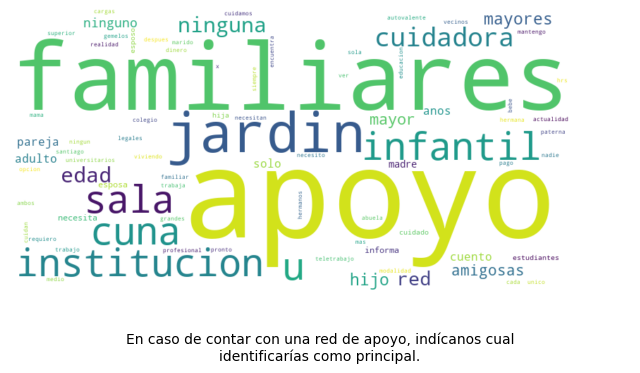





situacion_discapacidad


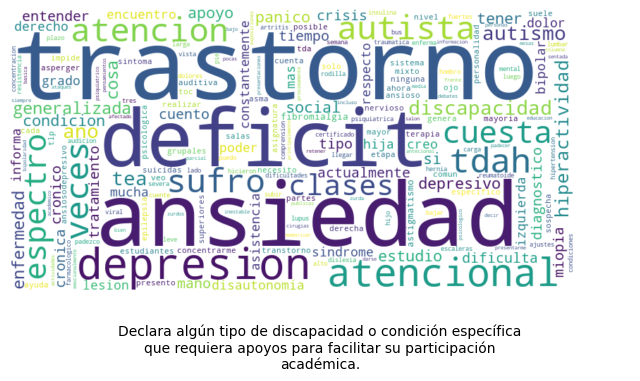





comentario_dificultad


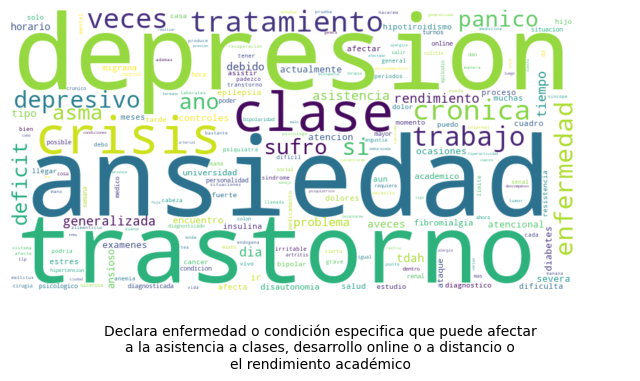





comentar_situacion_cuidados_campus


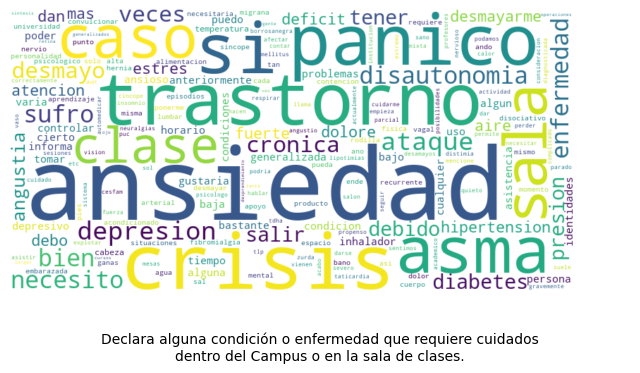





dependientes_de_estudiante


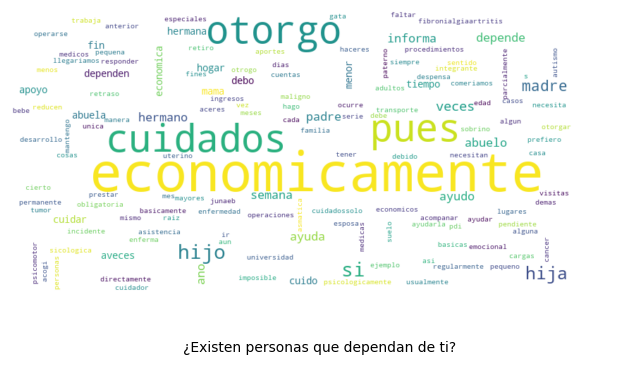





quien_depende_estudiante


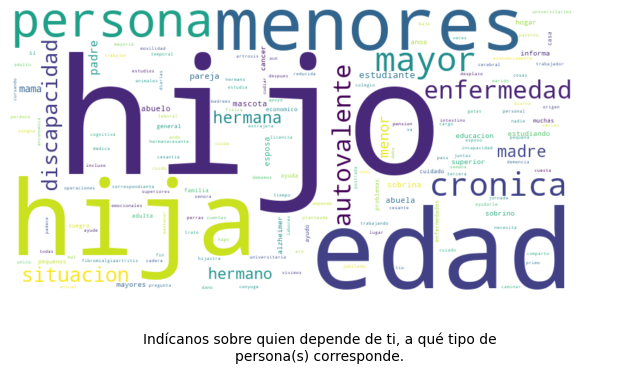





factores_dificultad_estudio


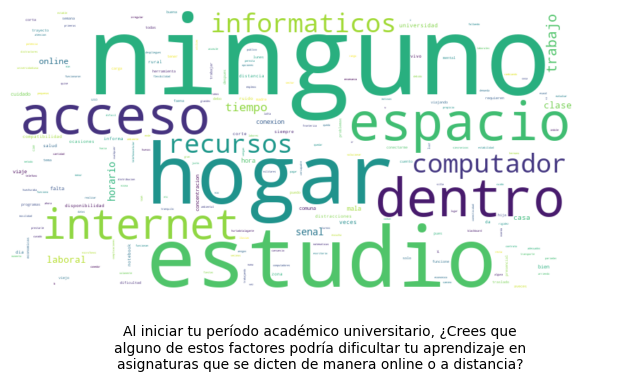





situacion_dificultad


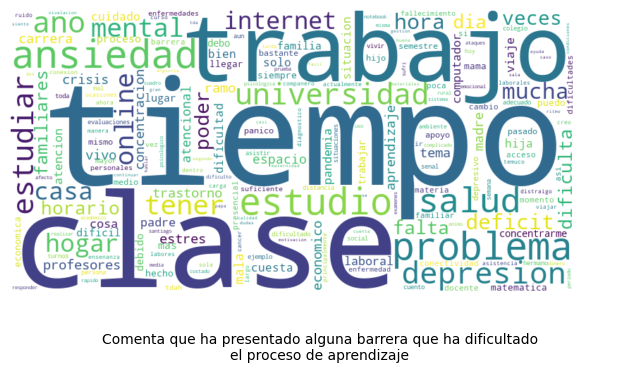





indica_deporte_hobbie


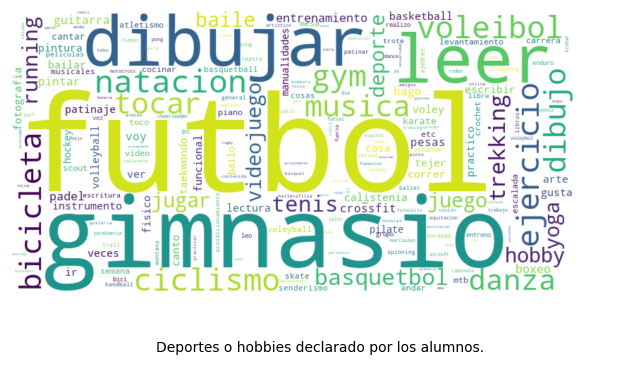





genero_se_identifica


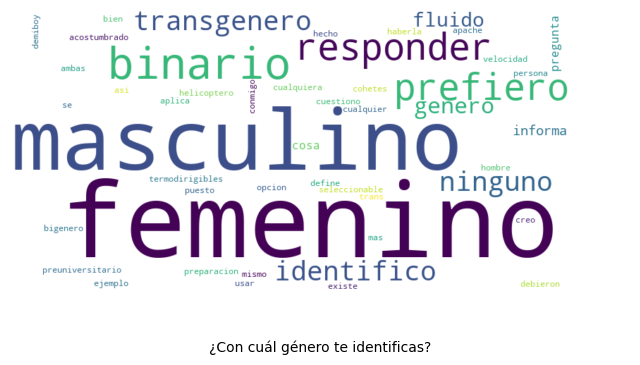





razon_ingreso_tardio_ed_mayor


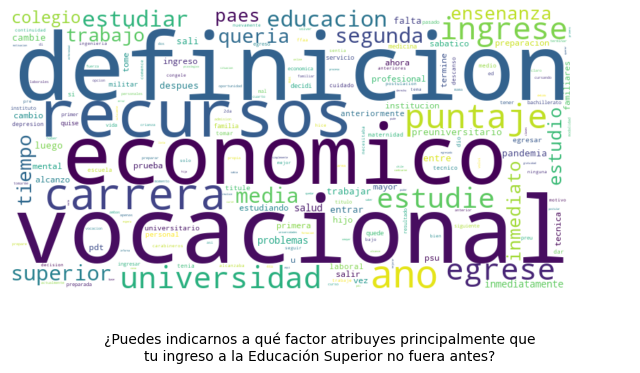

In [63]:
for cloud in wcloud:
    words = text_preproc(df, cloud)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, collocations=False).generate(words)
    print('\n\n\n')
    print(cloud)
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    titulo = def_dic[cloud] if cloud in def_dic else None
    plt.xlim(right=plt.xlim()[1] * 1.1)
    descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60))
    plt.text(0.5, -0.20, descripcion_recortada, ha='center', va='center', transform=plt.gca().transAxes)
    plt.show()


In [62]:
# Asignar los valores de la nueva columna genero_identifica_mfo
df['genero_identifica_mfo'] = np.where(df['genero_se_identifica'].isin(['Femenino', 'Masculino']), df['genero_se_identifica'], 'Otro')

In [29]:
graficar = ['declaracion_uso_datos', 't_desde_egreso', 'estudia_antes_edsup', 'finalizo_est_antes_edsup', 'estado_civil',
            'tiene_hijos', 'red_apoyo', 'etnia', 'declara_discapacidad', 'cuidados_dentro_campus', 'tramo_registro_social',
            'cuantos_convive_2023', 'situacion_laboral', 'horas_semanales_laboral', 'dependencia_grupo_familiar', 
            'horas_cuidado_estudiante', 'acceso_medio_digital', 'uso_exclusivo_medio_digital', 'acceso_internet_alumno',
            'dificultad_trayecto', 'requiere_pares_mentores', 'tiempo_traslado', 'medio_transporte', 'practica_deporte_hobbie', 
            'orientacion_sexual','condicion_dificultad_clases', 'situacion_laboral_jefe_hogar', 'lugar_estudio_alumno', 'genero_identifica_mfo']

In [30]:
nuevo_df = pd.DataFrame(df, columns=graficar)

# Seleccionar todas las columnas con tipo de dato "object"
columnas_object = nuevo_df.select_dtypes(include=['object']).columns

# Cambiar el tipo de dato de las columnas seleccionadas a "categorical"
nuevo_df[columnas_object] = nuevo_df[columnas_object].astype('category')

In [31]:
import seaborn as sns

In [32]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, break_long_words=break_long_words))
    ax.set_yticklabels(labels)

In [33]:
def graficar_mod(df, column):
    # Obtener los valores y sus frecuencias, ordenados de forma descendente
    value_counts = df[column].value_counts().sort_values(ascending=False)

    # Crear un DataFrame ordenado con los valores y sus frecuencias
    data = pd.DataFrame({column: value_counts.index, 'Cantidad de estudiantes': value_counts.values})

    # Crear el gráfico de barras utilizando Seaborn
    ax = sns.barplot(x='Cantidad de estudiantes', y=column, data=data, order=value_counts.index)

    # Configurar el título y las etiquetas de los ejes
    titulo = def_dic[column] if column in def_dic else None
    plt.title('Gráfico de ' + column)
    plt.xlabel('Cantidad de estudiantes')
    plt.ylabel(column)
    ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
    descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60))
    plt.text(0.5, -0.20, descripcion_recortada, ha='center', va='center', transform=ax.transAxes)
    # Agregar los valores en las barras
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        value = int(width)
        ax.annotate(f'{value}', (x + width, y + height/2), ha='left', va='center')

    plt.show()


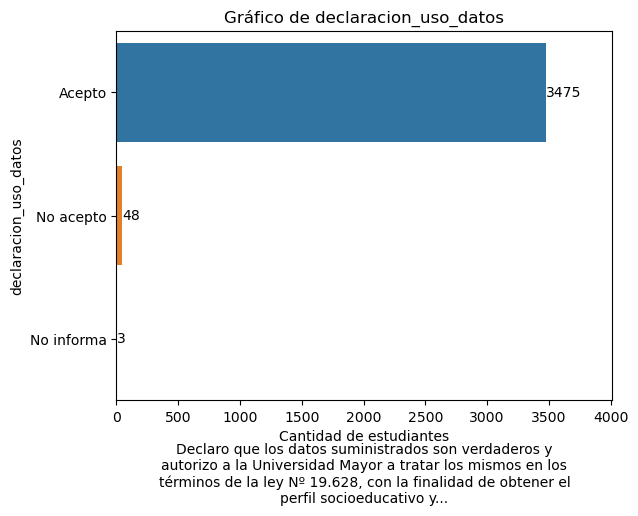

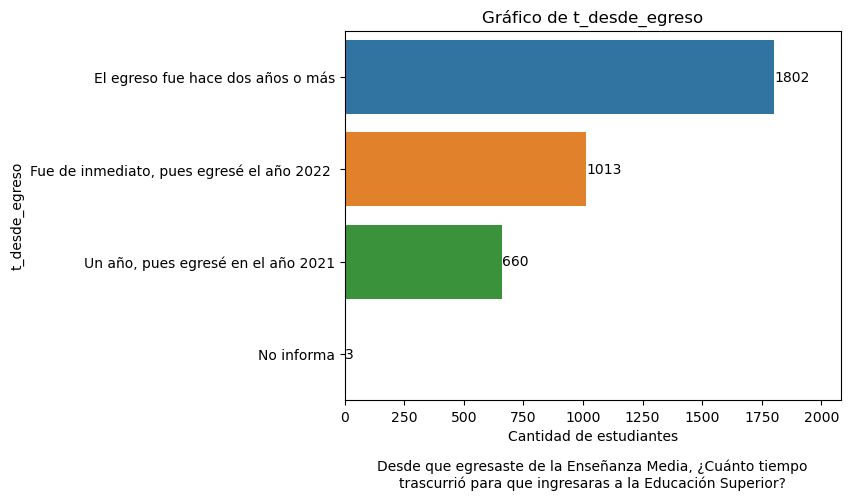

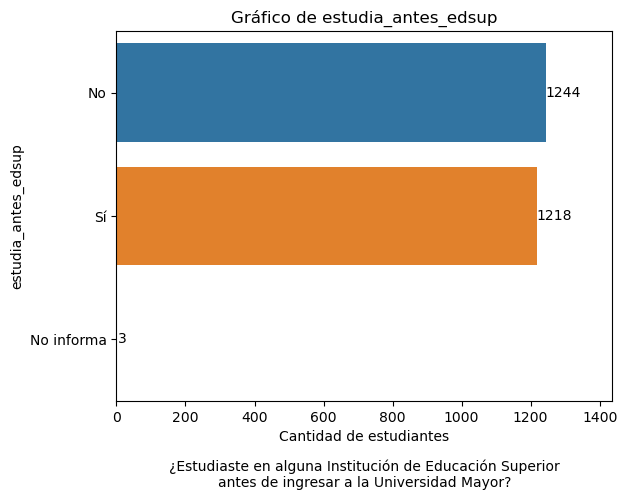

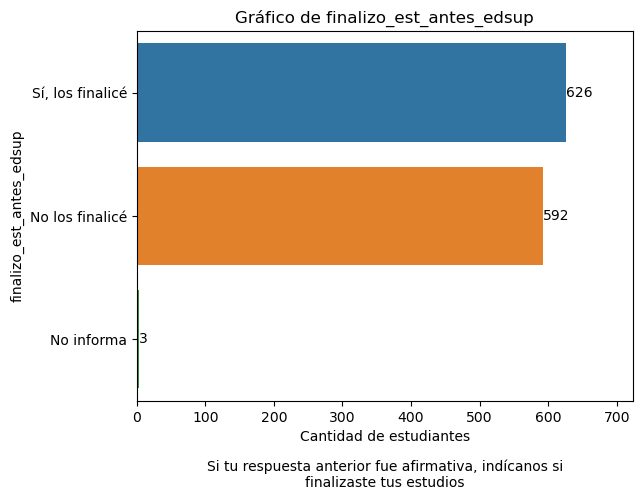

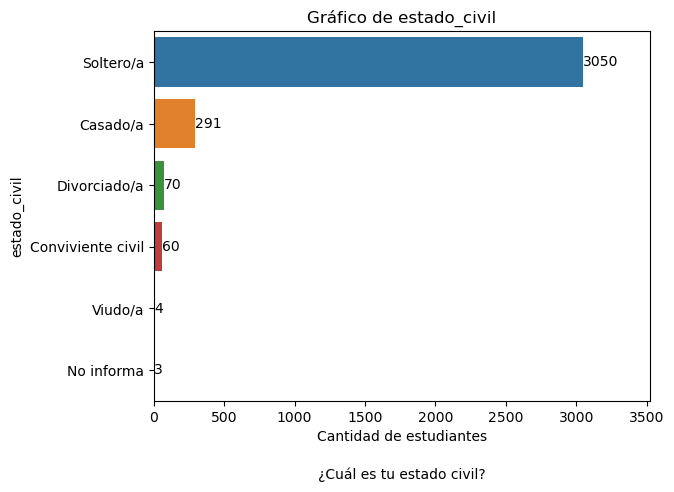

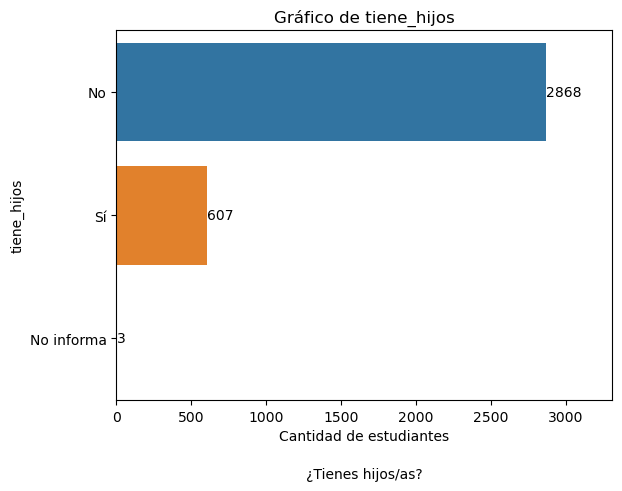

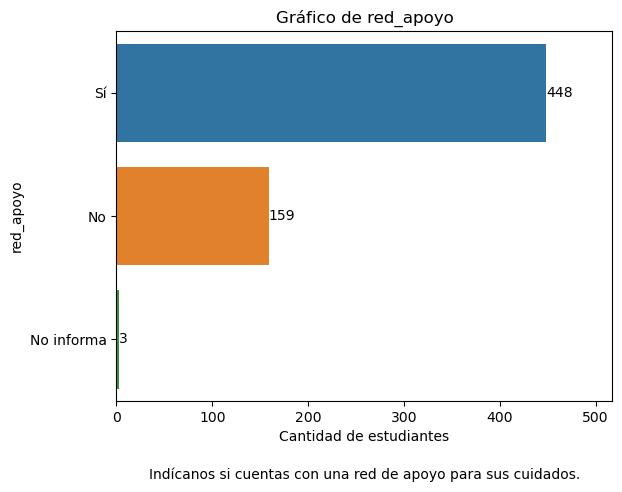

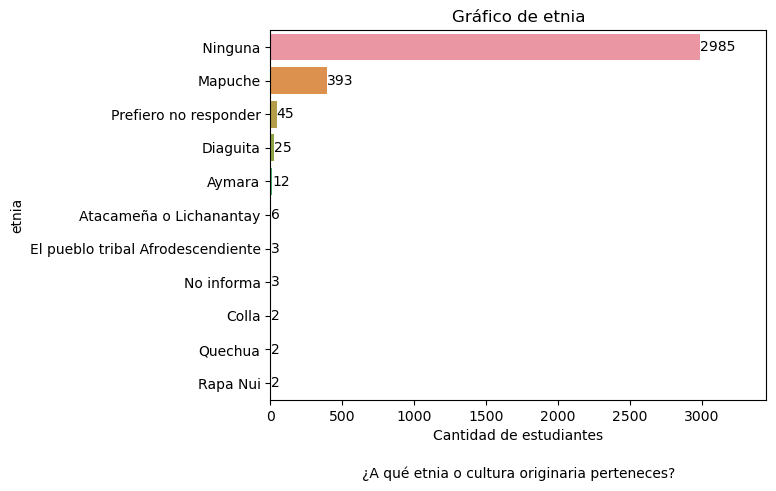

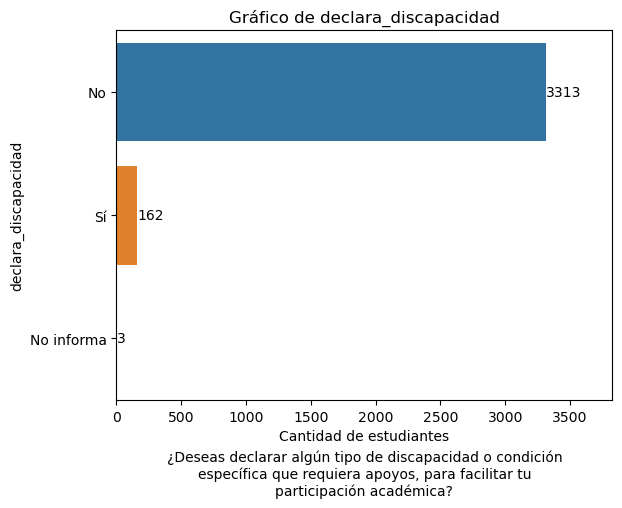

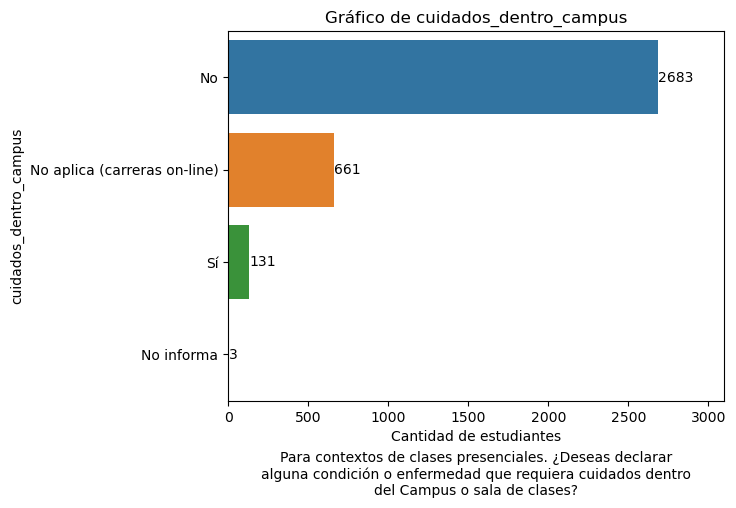

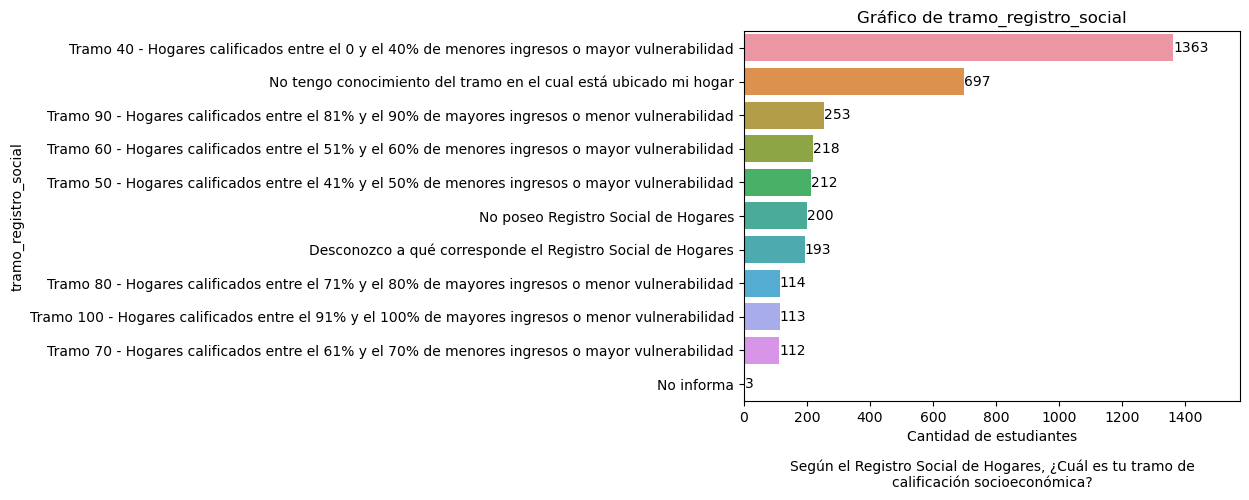

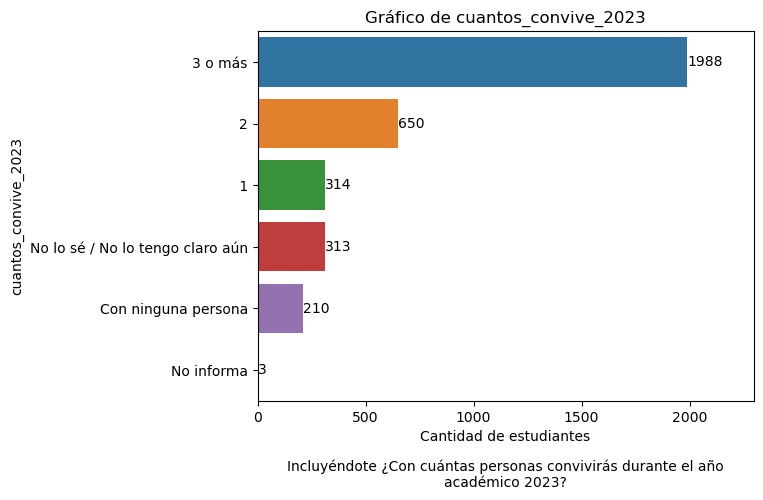

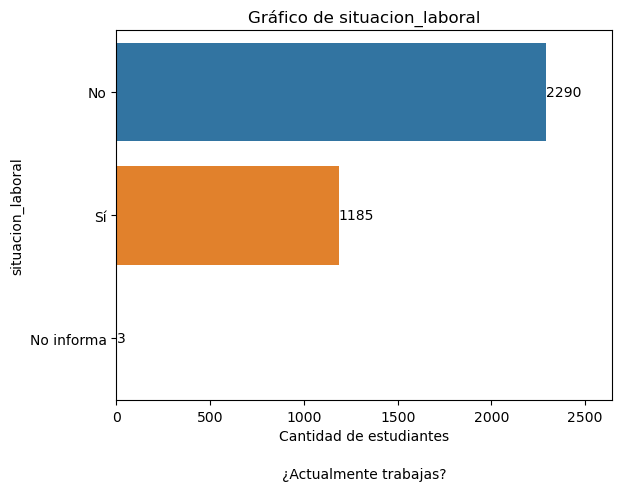

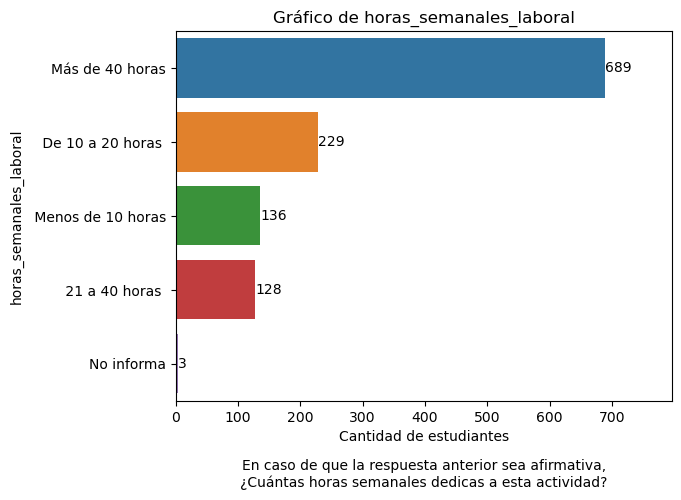

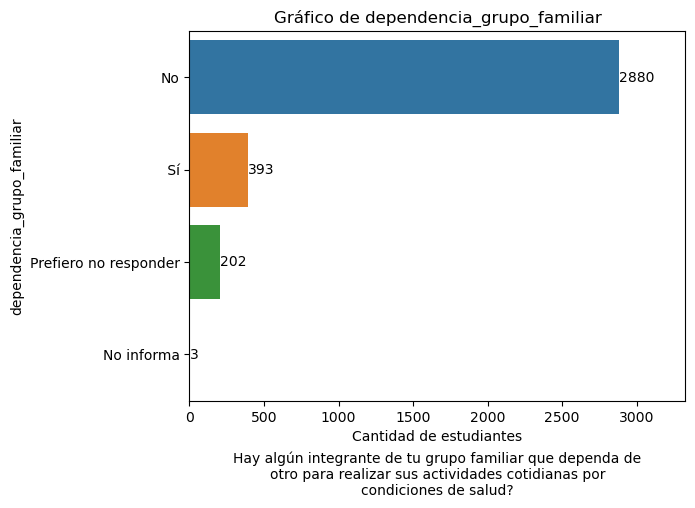

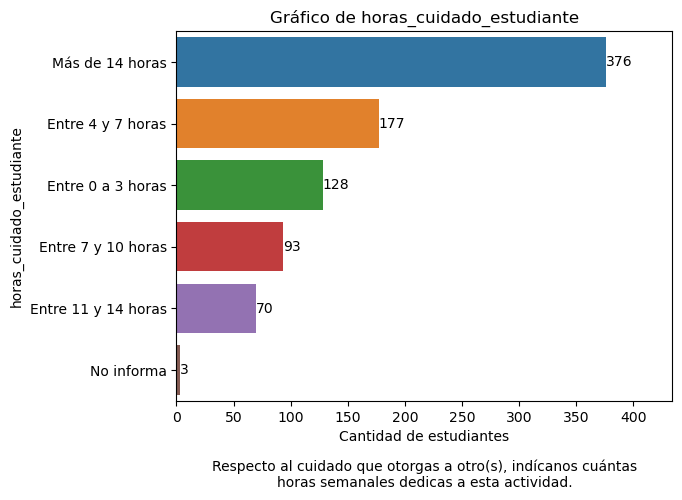

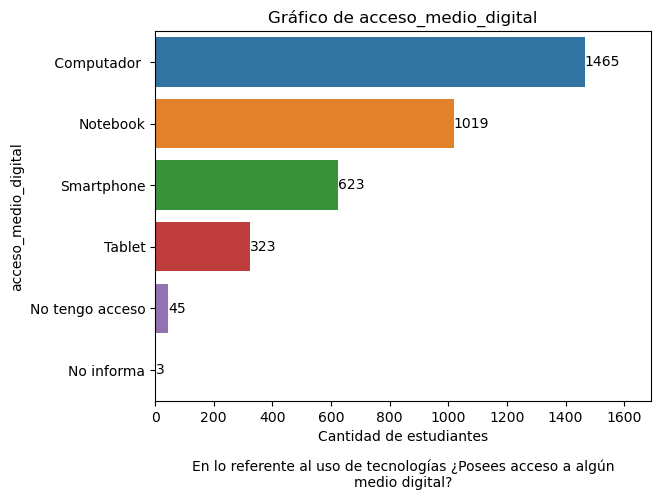

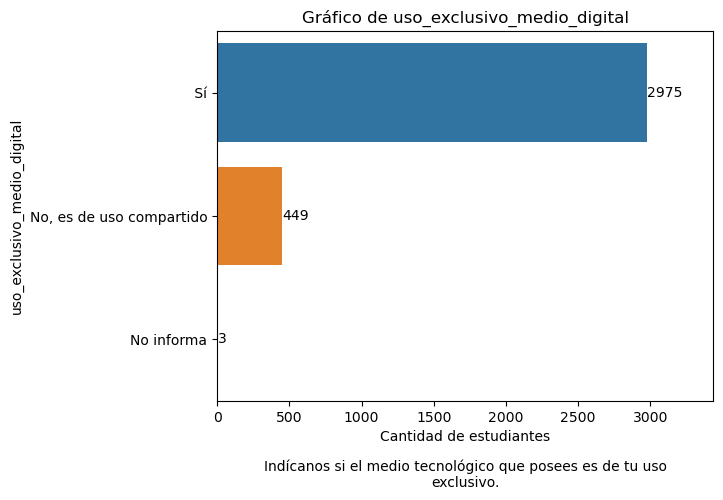

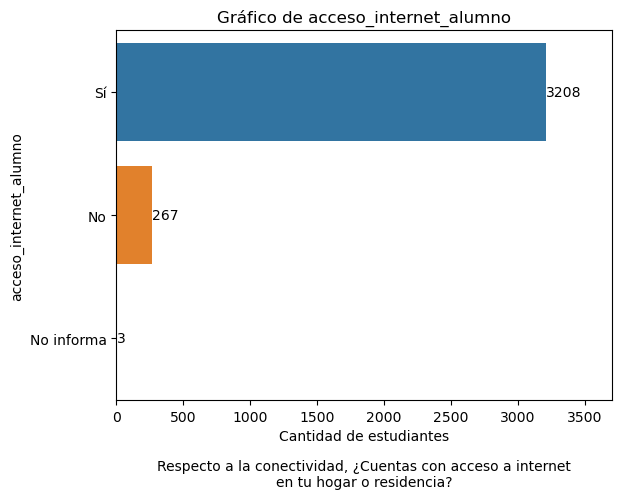

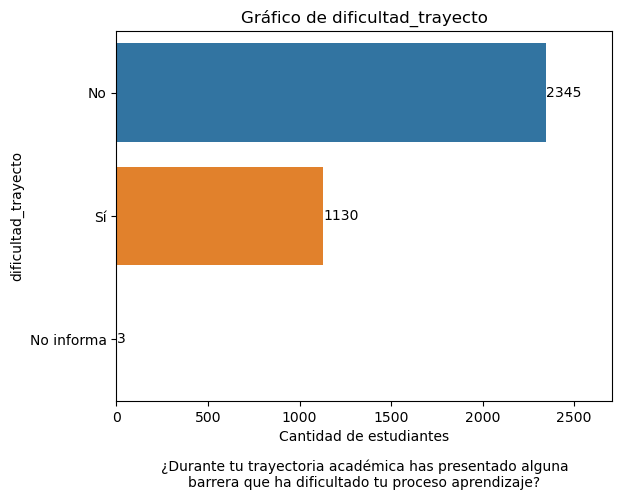

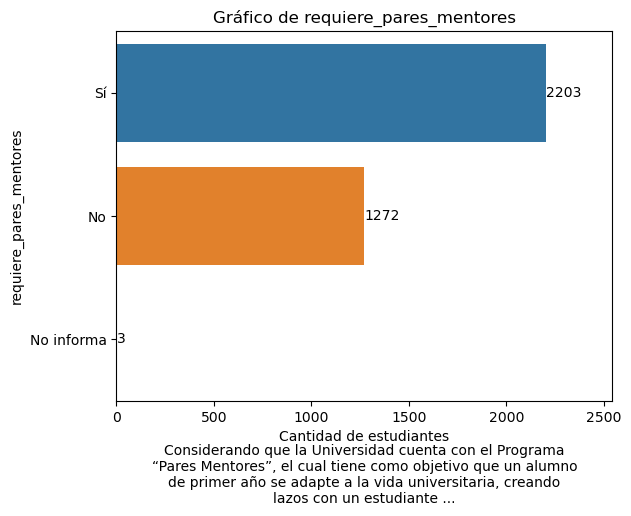

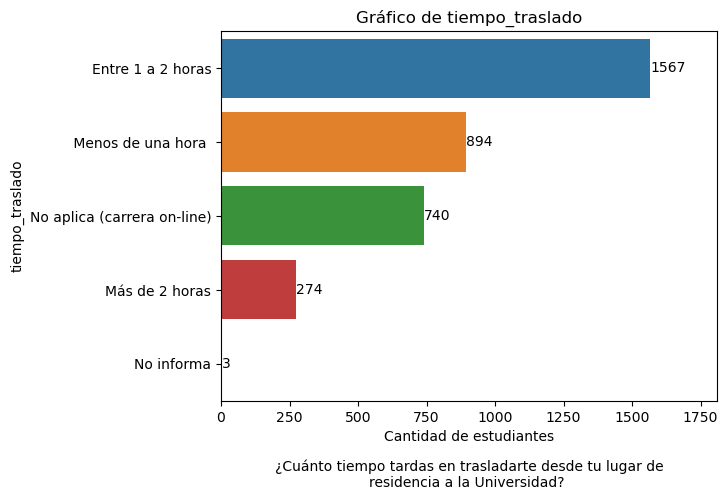

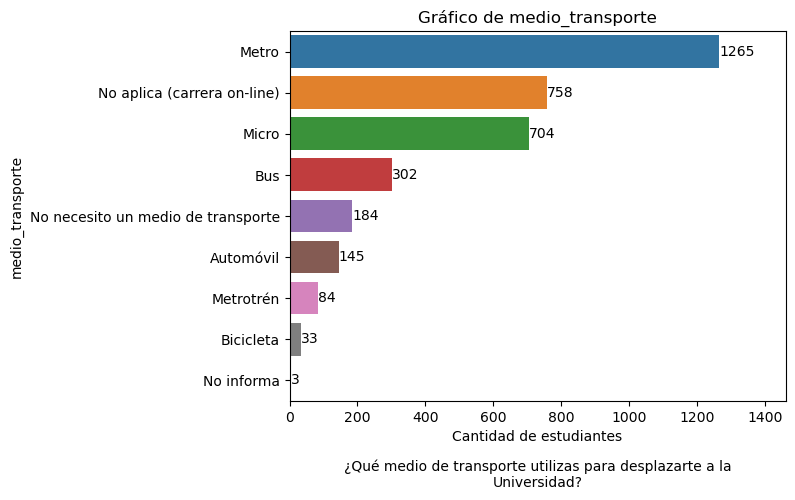

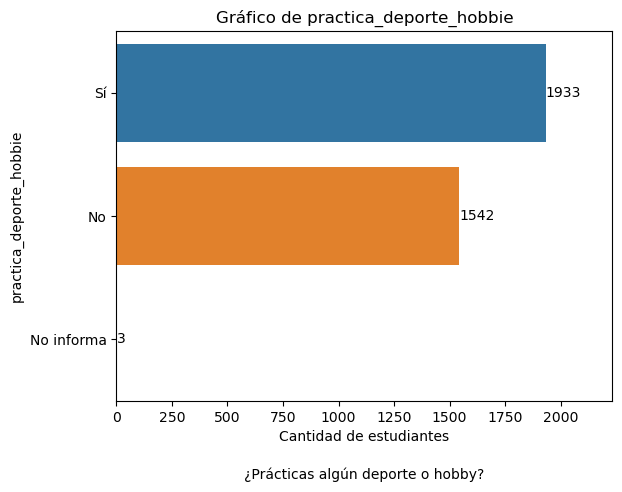

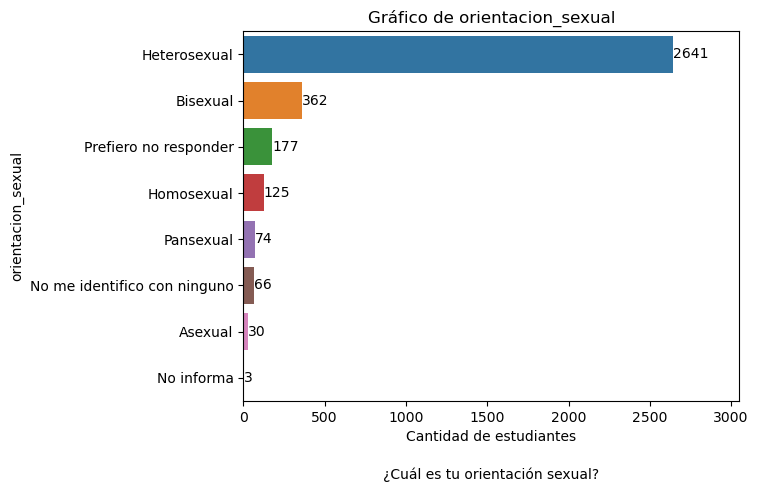

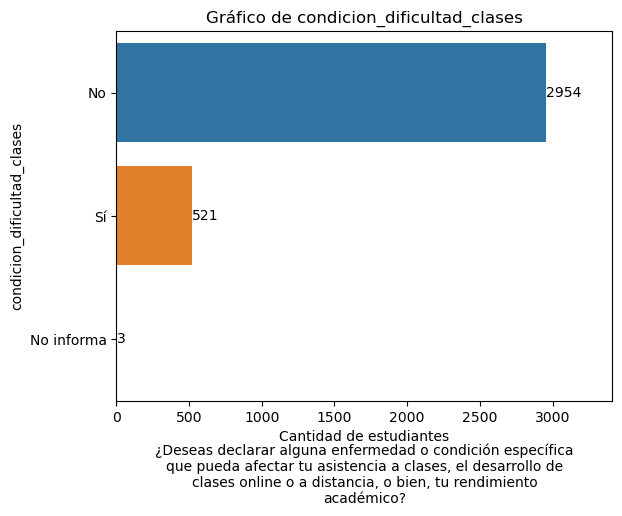

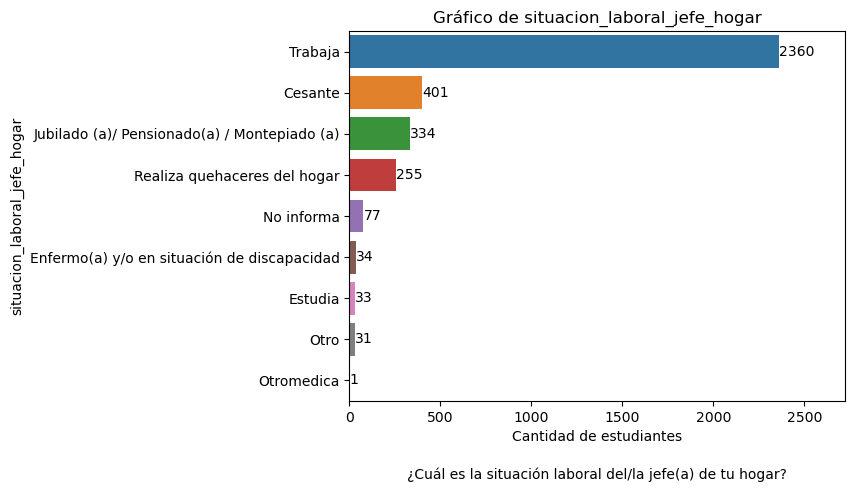

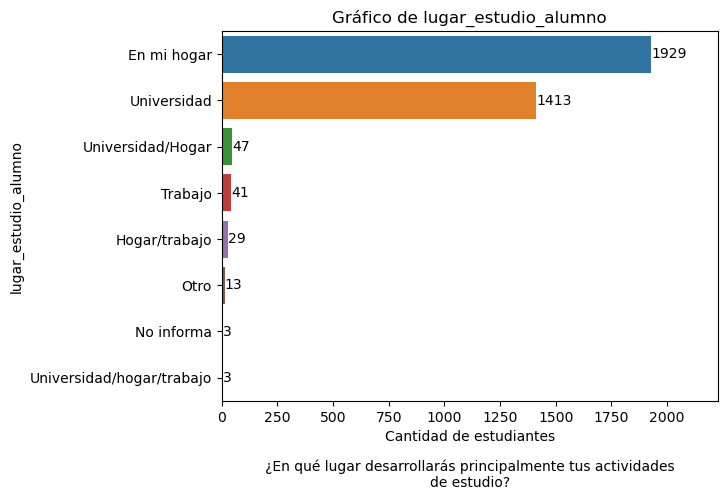

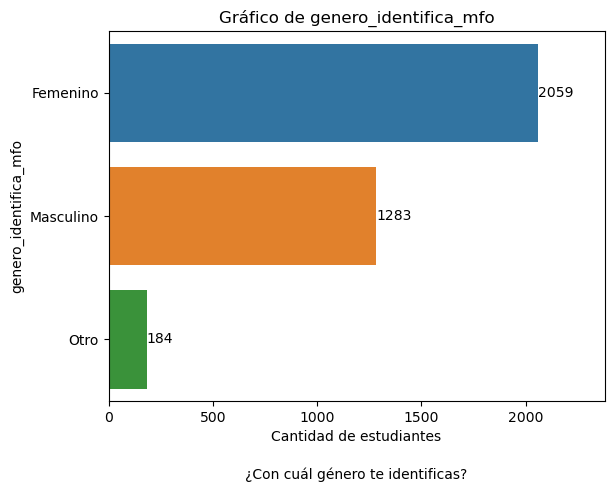

In [34]:
for gr in graficar:
    graficar_mod(nuevo_df, gr)

## Plot de las preguntas con respuesta multiple

C:\Users\yerko.gallardo\AppData\Local\Temp\ipykernel_7340\2965535713.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')






quien_red_apoyo


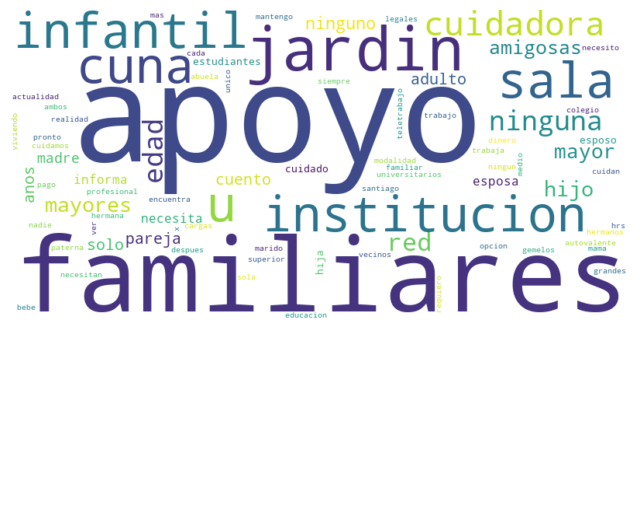





situacion_discapacidad


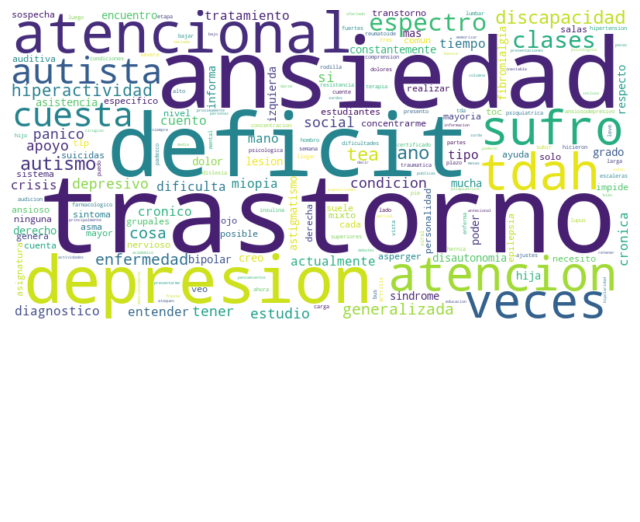





comentario_dificultad


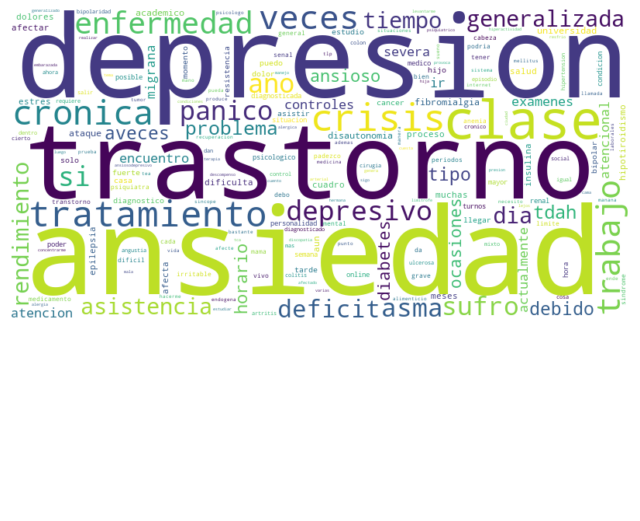





comentar_situacion_cuidados_campus


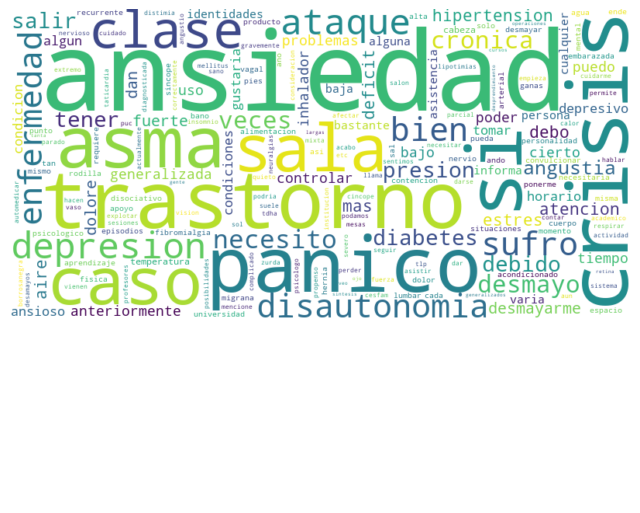





dependientes_de_estudiante


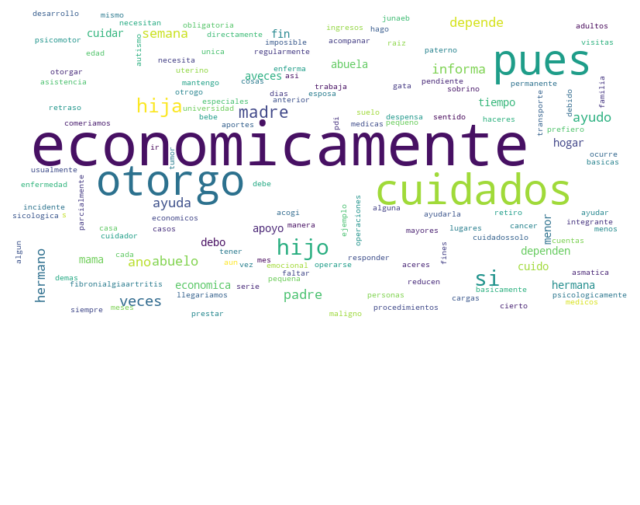





quien_depende_estudiante


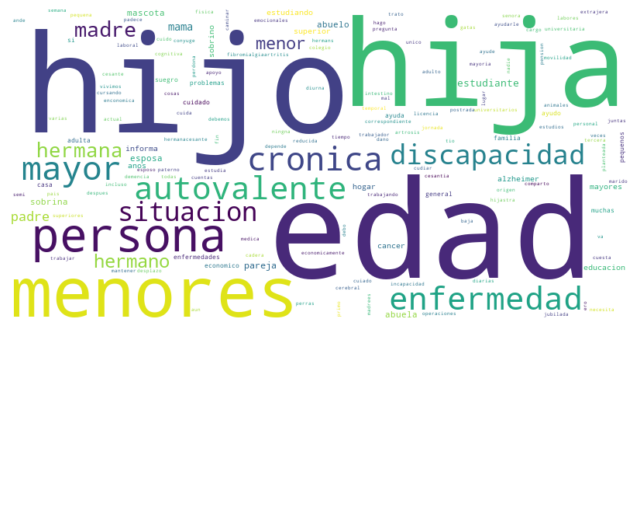





factores_dificultad_estudio


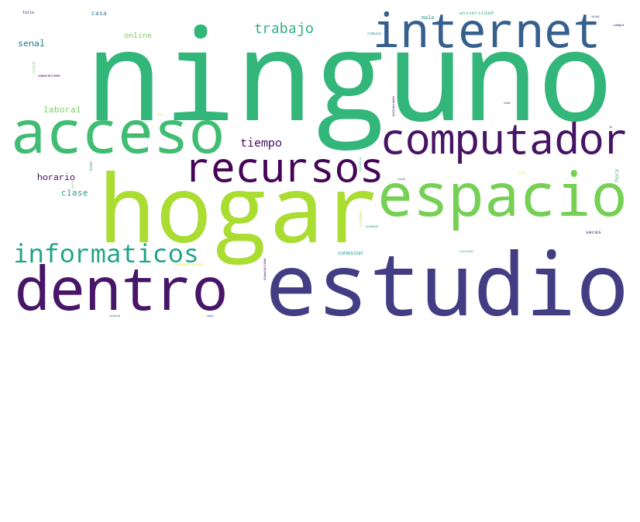





situacion_dificultad


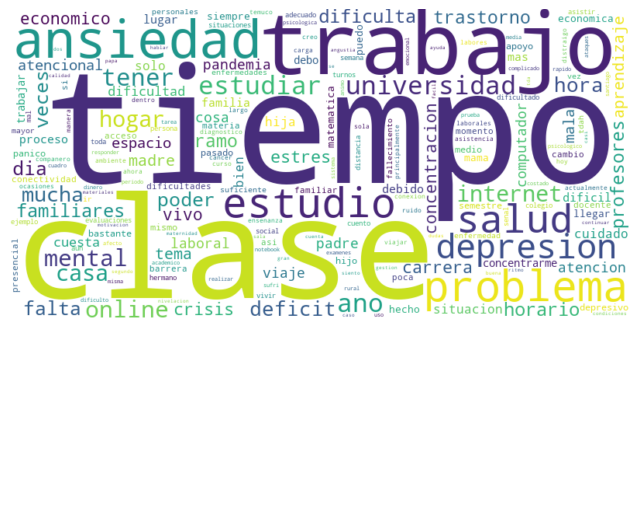





indica_deporte_hobbie


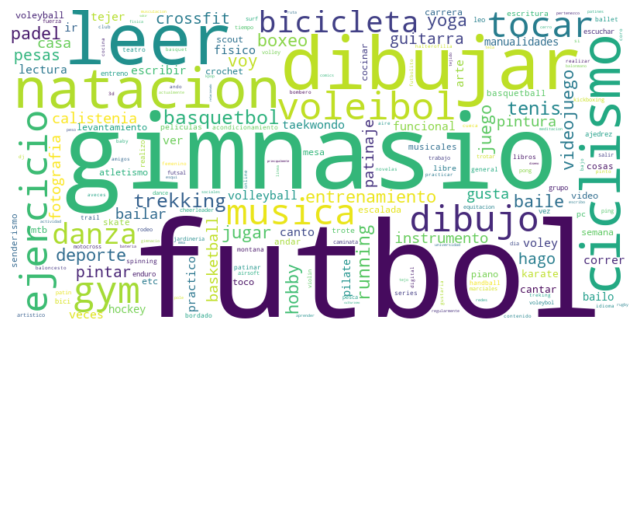





genero_se_identifica


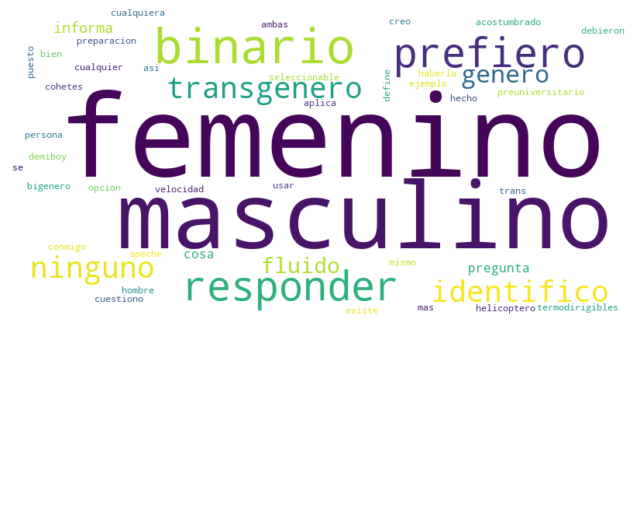





razon_ingreso_tardio_ed_mayor


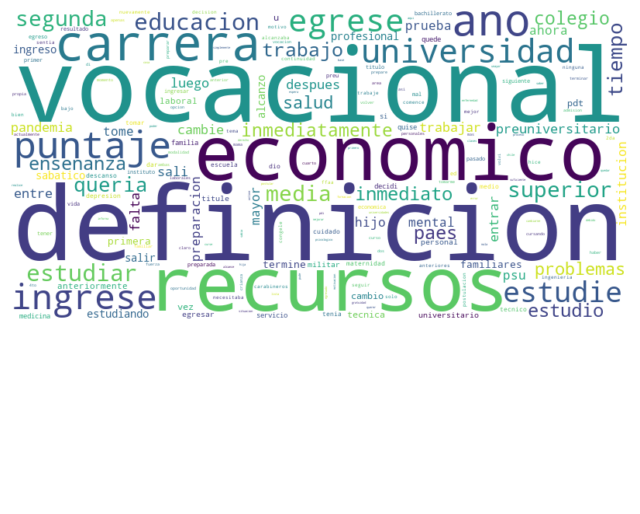

In [61]:
for cloud in wcloud:
    #df['text'] = df[cloud]
    words = text_preproc(df, cloud)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, collocations=False).generate(words)
    print('\n\n\n')
    print(cloud)
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    titulo = def_dic[cloud] if cloud in def_dic else None
    ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
    descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60))
    plt.text(0.5, -0.20, descripcion_recortada, ha='center', va='center', transform=ax.transAxes)
    plt.show()

In [35]:
def rep_otros(dataset, num): 
    sum_values = dataset.sum().sort_values(ascending=False)
    sorted_dataset = dataset[sum_values.index]
    originales = sorted_dataset.iloc[:, :num]
    columnas_a_contar = sorted_dataset.iloc[:, num:]
    suma_total_coincidencias = columnas_a_contar.sum().sum()
    nueva_fila = pd.DataFrame({'Otros': [suma_total_coincidencias]})
    multi_un = pd.concat([originales, nueva_fila], ignore_index=True).fillna(0)
    sum_values = multi_un.sum().sort_values(ascending=False)
    sorted_dataset = multi_un[sum_values.index]
    multi_sorted = sorted_dataset.copy()
    return multi_sorted

In [36]:
multi= df['acreditacion_discapacidad'].str.get_dummies(sep=';')

In [37]:
multi_sor = rep_otros(multi, 5)

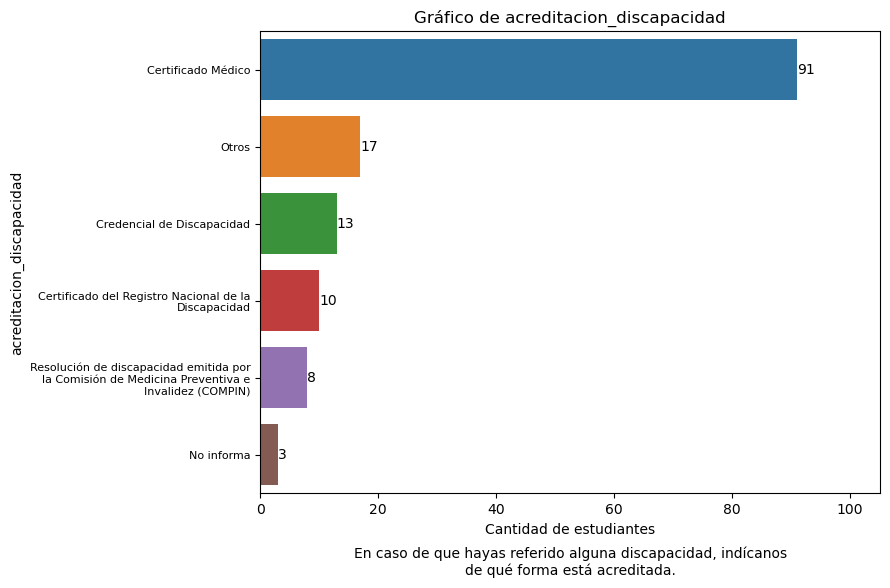

In [38]:
column = 'acreditacion_discapacidad'
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=multi_sor.sum().values, y=multi_sor.columns, ax=ax, order=multi_sor.sum().sort_values(ascending=False).index)
plt.yticks(fontsize=8)
wrap_labels(ax, 40)
titulo = def_dic[column] if column in def_dic else None
plt.title('Gráfico de ' + column)
plt.xlabel('Cantidad de estudiantes')
plt.ylabel(column)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60))
plt.text(0.5, -0.15, descripcion_recortada, ha='center', va='center', transform=ax.transAxes)
# Agregar los valores en las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    value = int(width)
    ax.annotate(f'{value}', (x + width, y + height/2), ha='left', va='center')
plt.show()

In [39]:
multi = df['estudios_familiar'].str.get_dummies(sep=';')

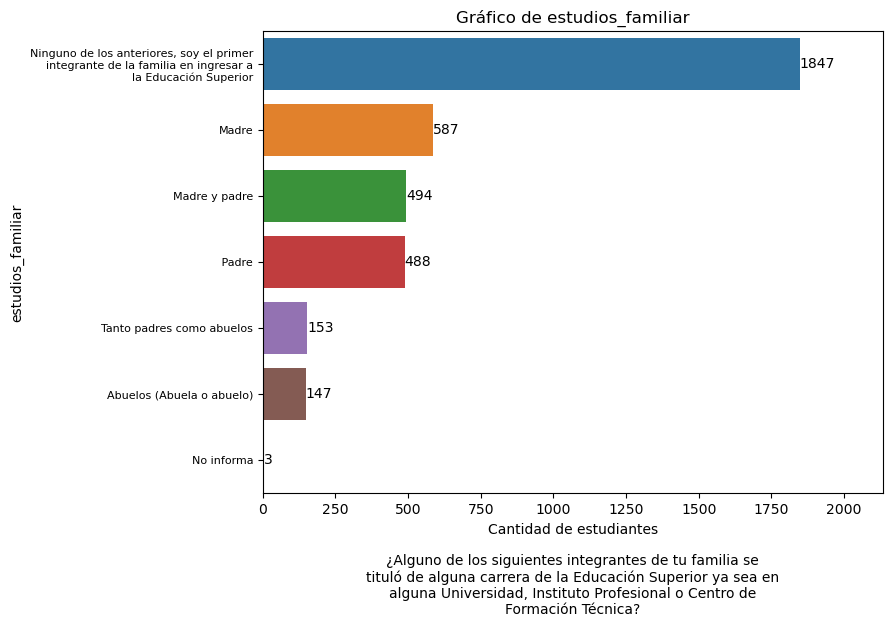

In [40]:
column = 'estudios_familiar'
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=multi.sum().values, y=multi.columns, ax=ax, order=multi.sum().sort_values(ascending=False).index)
plt.yticks(fontsize=8)
wrap_labels(ax, 40)
titulo = def_dic[column] if column in def_dic else None
plt.title('Gráfico de ' + column)
plt.xlabel('Cantidad de estudiantes')
plt.ylabel(column)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60))
plt.text(0.5, -0.20, descripcion_recortada, ha='center', va='center', transform=ax.transAxes)
# Agregar los valores en las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    value = int(width)
    ax.annotate(f'{value}', (x + width, y + height/2), ha='left', va='center')
plt.show()

In [41]:
multi = df['mayores_habilidades'].str.get_dummies(sep=';')

In [42]:
multi_sor = rep_otros(multi, 8)

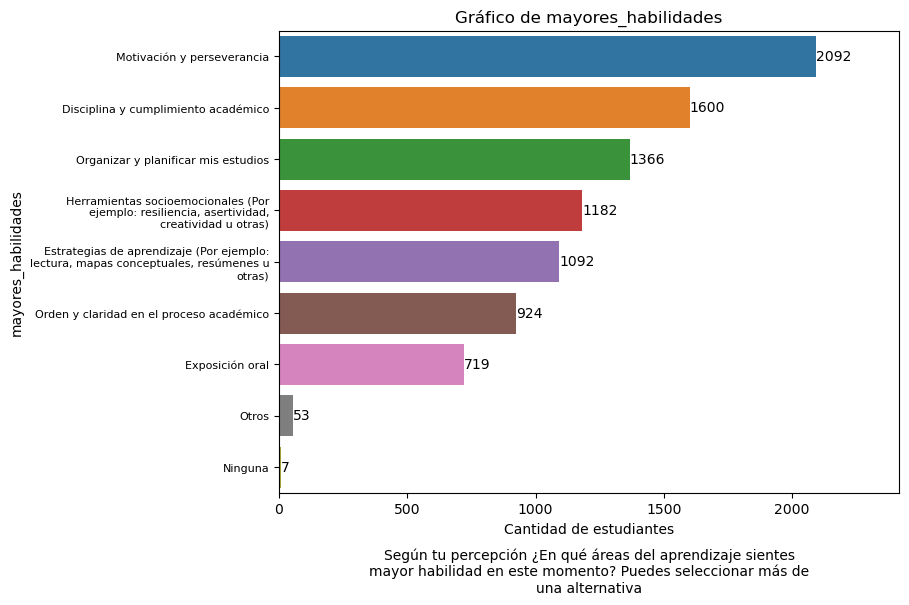

In [43]:
column = 'mayores_habilidades'
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=multi_sor.sum().values, y=multi_sor.columns, ax=ax, order=multi_sor.sum().sort_values(ascending=False).index)
plt.yticks(fontsize=8)
wrap_labels(ax, 40)
titulo = def_dic[column] if column in def_dic else None
plt.title('Gráfico de ' + column)
plt.xlabel('Cantidad de estudiantes')
plt.ylabel(column)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60))
plt.text(0.5, -0.17, descripcion_recortada, ha='center', va='center', transform=ax.transAxes)
# Agregar los valores en las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    value = int(width)
    ax.annotate(f'{value}', (x + width, y + height/2), ha='left', va='center')
plt.show()

In [44]:
multi = df['area_aprendizaje_quiere_potenciar'].str.get_dummies(sep=';')

In [45]:
multi_sor = rep_otros(multi, 8)

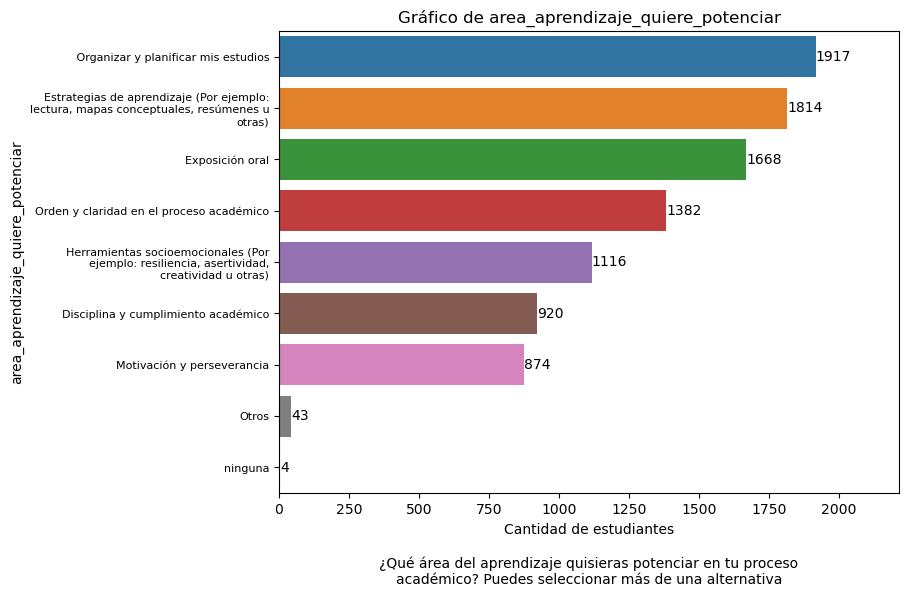

In [46]:
column = 'area_aprendizaje_quiere_potenciar'
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=multi_sor.sum().values, y=multi_sor.columns, ax=ax, order=multi_sor.sum().sort_values(ascending=False).index)
plt.yticks(fontsize=8)
wrap_labels(ax, 40)
titulo = def_dic[column] if column in def_dic else None
plt.title('Gráfico de ' + column)
plt.xlabel('Cantidad de estudiantes')
plt.ylabel(column)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60))
plt.text(0.5, -0.17, descripcion_recortada, ha='center', va='center', transform=ax.transAxes)
# Agregar los valores en las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    value = int(width)
    ax.annotate(f'{value}', (x + width, y + height/2), ha='left', va='center')
plt.show()

In [47]:
multi = df['apoyo_pedadogico_requiere'].str.get_dummies(sep=';')

In [48]:
multi_sor = rep_otros(multi, 5)

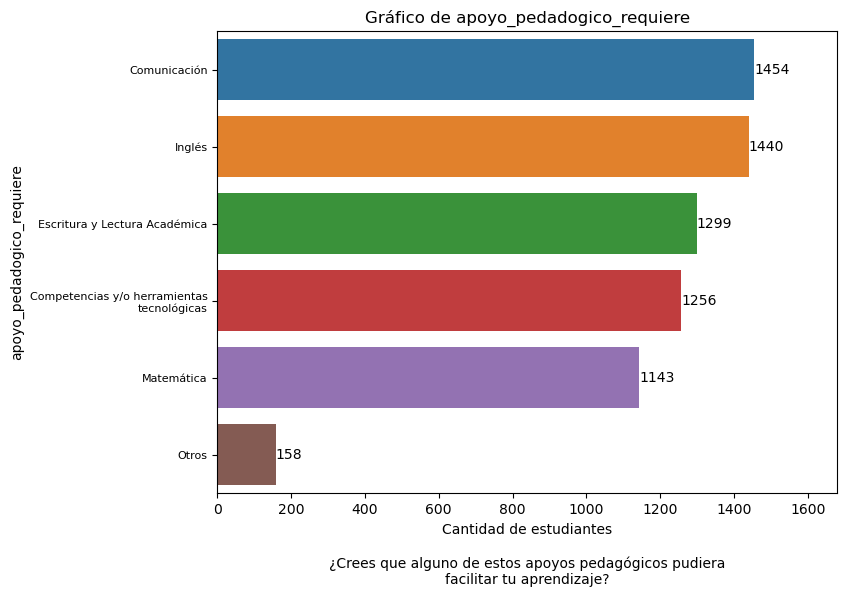

In [49]:
column = 'apoyo_pedadogico_requiere'
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=multi_sor.sum().values, y=multi_sor.columns, ax=ax, order=multi_sor.sum().sort_values(ascending=False).index)
plt.yticks(fontsize=8)
wrap_labels(ax, 40)
titulo = def_dic[column] if column in def_dic else None
plt.title('Gráfico de ' + column)
plt.xlabel('Cantidad de estudiantes')
plt.ylabel(column)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60))
plt.text(0.5, -0.17, descripcion_recortada, ha='center', va='center', transform=ax.transAxes)
# Agregar los valores en las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    value = int(width)
    ax.annotate(f'{value}', (x + width, y + height/2), ha='left', va='center')
plt.show()

In [50]:
multi = df['actividades_de_interes'].str.get_dummies(sep=';')

In [51]:
multi_sor = rep_otros(multi, 8)

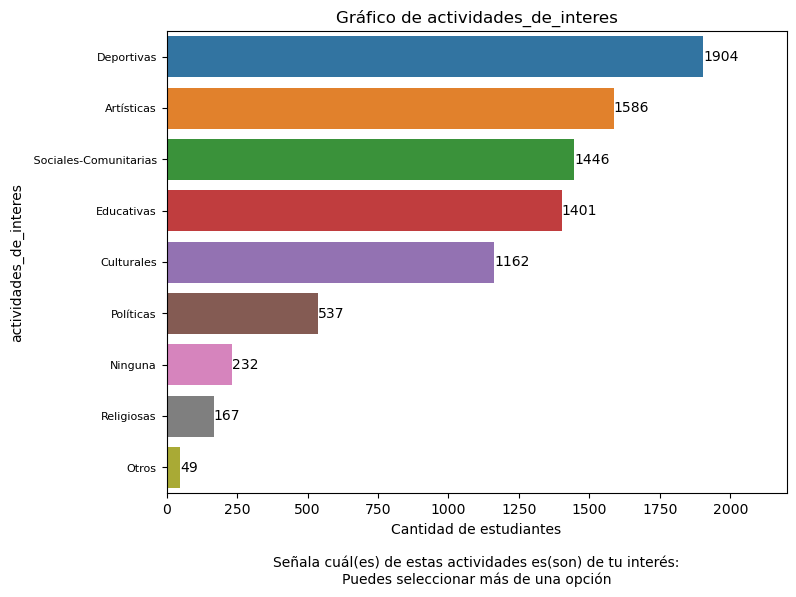

In [52]:
column = 'actividades_de_interes'
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=multi_sor.sum().values, y=multi_sor.columns, ax=ax, order=multi_sor.sum().sort_values(ascending=False).index)
plt.yticks(fontsize=8)
wrap_labels(ax, 40)
titulo = def_dic[column] if column in def_dic else None
plt.title('Gráfico de ' + column)
plt.xlabel('Cantidad de estudiantes')
plt.ylabel(column)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60))
plt.text(0.5, -0.17, descripcion_recortada, ha='center', va='center', transform=ax.transAxes)
# Agregar los valores en las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    value = int(width)
    ax.annotate(f'{value}', (x + width, y + height/2), ha='left', va='center')
plt.show()

In [53]:
multi = df['preferencias_estudio'].str.get_dummies(sep=';')

In [54]:
multi_sor = rep_otros(multi, 6)

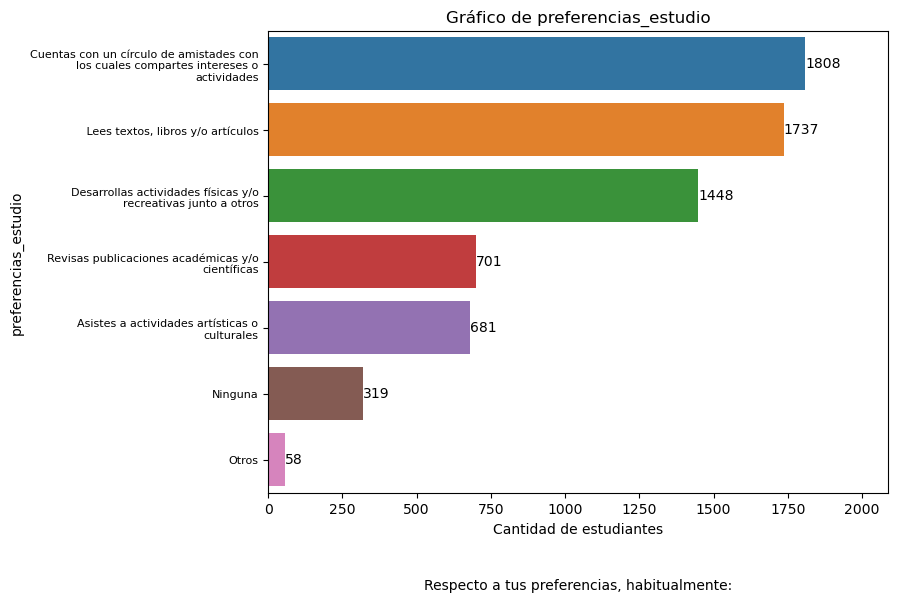

In [55]:
column = 'preferencias_estudio'
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=multi_sor.sum().values, y=multi_sor.columns, ax=ax, order=multi_sor.sum().sort_values(ascending=False).index)
plt.yticks(fontsize=8)
wrap_labels(ax, 40)
titulo = def_dic[column] if column in def_dic else None
plt.title('Gráfico de ' + column)
plt.xlabel('Cantidad de estudiantes')
plt.ylabel(column)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60))
plt.text(0.5, -0.20, descripcion_recortada, ha='center', va='center', transform=ax.transAxes)
# Agregar los valores en las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    value = int(width)
    ax.annotate(f'{value}', (x + width, y + height/2), ha='left', va='center')
plt.show()

In [56]:
multi = df['preferencia_act_extracurricular'].str.get_dummies(sep=';')

In [57]:
multi_sor = rep_otros(multi, 4)

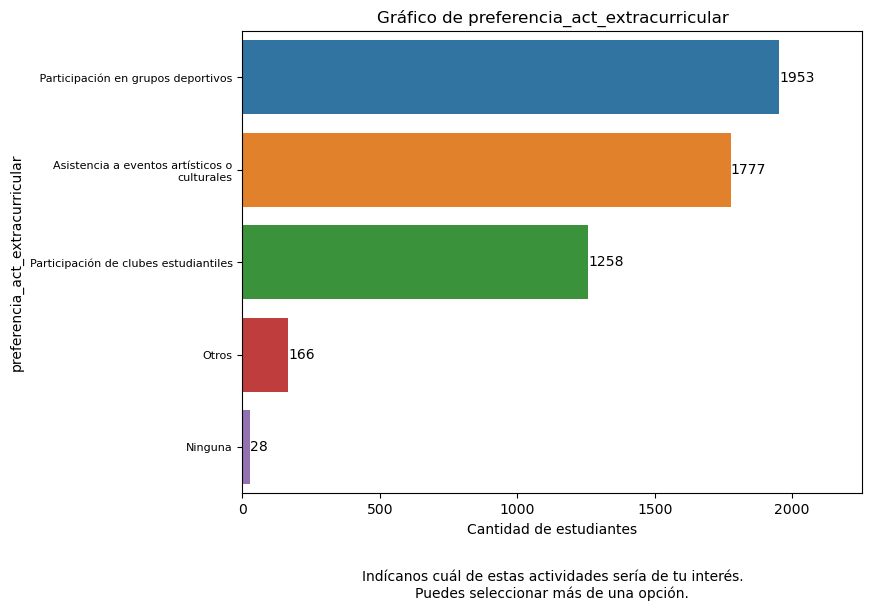

In [58]:
column = 'preferencia_act_extracurricular'
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=multi_sor.sum().values, y=multi_sor.columns, ax=ax, order=multi_sor.sum().sort_values(ascending=False).index)
plt.yticks(fontsize=8)
wrap_labels(ax, 40)
titulo = def_dic[column] if column in def_dic else None
plt.title('Gráfico de ' + column)
plt.xlabel('Cantidad de estudiantes')
plt.ylabel(column)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60))
plt.text(0.5, -0.20, descripcion_recortada, ha='center', va='center', transform=ax.transAxes)
# Agregar los valores en las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    value = int(width)
    ax.annotate(f'{value}', (x + width, y + height/2), ha='left', va='center')
plt.show()